Project Report Title 


Dataset Link: https://nces.ed.gov/ccd/files.asp Fiscal year 2017-2018 District Level

Authors: Sarah Mueller, Alberto Veloso, Grant Ball

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Reading and Preparation 

**Data Preperation**<br>In this section we simply load in our data to our dataframe, remove NaN values (or -2 in this case), and then create a new column we will predict against.

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv('sdf18_1a.txt',sep="\t")#1. Load UCD school data into data frame

df.drop(df.columns.difference(['STNAME','TOTALREV', 'TFEDREV', 'TLOCREV', 'Z32', 'V93', 'C10', 'TSTREV', 'Z34', 'K10', 'V33']), 1, inplace=True) # This syntax grabs ONLY the columns listed; ignore many less pertinent pieces of data.

df.rename(columns={'STNAME':'State'}, inplace = True)
df.rename(columns={'TLOCREV':'Total Local Revenue'}, inplace = True)
df.rename(columns={'TFEDREV':'Total Fed Rev'}, inplace = True)
df.rename(columns={'TOTALREV':'Total Rev (=state+local+fed)'}, inplace = True)
df.rename(columns={'Z32':'Total salaries'}, inplace = True)
df.rename(columns={'V93':'Textbook Costs'}, inplace = True)
df.rename(columns={'C10':'STATE REVENUE - SCHOOL LUNCH PROGRAMS'}, inplace = True)
df.rename(columns={'TSTREV':'Total State Revenue'}, inplace = True)
df.rename(columns={'Z34':'Total employee benefits'}, inplace = True)
df.rename(columns={'TOTALEXP':'Total expenditures'}, inplace = True)
df.rename(columns={'K10':'CAPITAL OUTLAY - OTHER EQUIPMENT'}, inplace = True)
df.rename(columns={'V33':'# of students'}, inplace = True)

#drop all not texas
df = df[df.State == 'Texas']

#FEATURE NORMALIZATION
df =df.replace(-2, 0) # -2 means the data 'isn't applicable' or provided so let's make it 0
#this can potentially cause this cause us outliers?

df['Poverty'] = df['Total State Revenue'].apply(lambda x:'0' if x in range(0,8216000) else '1')

df.head(n=15) # lets manually investigate the data and ensure it's okay!

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,# of students,Total Rev (=state+local+fed),Total Fed Rev,Total State Revenue,STATE REVENUE - SCHOOL LUNCH PROGRAMS,Total Local Revenue,CAPITAL OUTLAY - OTHER EQUIPMENT,Total salaries,Total employee benefits,Textbook Costs,Poverty
15806,Texas,367,7486000,612000,3374000,5000,3500000,423000,2770000,532000,3000,1
15807,Texas,261,4761000,228000,2120000,1000,2413000,79000,2131000,299000,11000,1
15808,Texas,313,4535000,304000,759000,1000,3472000,146000,1907000,358000,11000,1
15809,Texas,271,5998000,909000,2570000,0,2519000,0,3914000,325000,0,1
15810,Texas,158,8561000,24000,2162000,6000,6375000,68000,2054000,334000,21000,1
15811,Texas,227,3457000,128000,978000,0,2351000,9000,1610000,251000,5000,1
15812,Texas,174,2432000,178000,833000,1000,1421000,0,1259000,234000,8000,1
15813,Texas,6450,81785000,1982000,7216000,6000,72587000,1252000,38327000,6156000,447000,1
15814,Texas,2445,29440000,1339000,2552000,4000,25549000,82000,14976000,2493000,27000,1
15815,Texas,19862,215066000,13149000,88317000,46000,113600000,1767000,123348000,21479000,718000,2


**Test & Train data preperation**<br>
In this section we grab the values and split the data into test and train, for later prediction.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df.drop(['State'], axis = 1,inplace=True)

# Assign values of the independant features column to y, note you have to use .values method
y = df.Poverty.values
# Drop the previously grabbed column from data frame,
df.drop(columns=['Poverty'], inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape, y.shape

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

# Create a KNN model using sklearn library, k=3 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with the train data
knn.fit(xtrain, ytrain)

,# of students,Total Rev (=state+local+fed),Total Fed Rev,Total State Revenue,STATE REVENUE - SCHOOL LUNCH PROGRAMS,Total Local Revenue,CAPITAL OUTLAY - OTHER EQUIPMENT,Total salaries,Total employee benefits,Textbook Costs
15806,367,7486000,612000,3374000,5000,3500000,423000,2770000,532000,3000
15807,261,4761000,228000,2120000,1000,2413000,79000,2131000,299000,11000
15808,313,4535000,304000,759000,1000,3472000,146000,1907000,358000,11000
15809,271,5998000,909000,2570000,0,2519000,0,3914000,325000,0
15810,158,8561000,24000,2162000,6000,6375000,68000,2054000,334000,21000
15811,227,3457000,128000,978000,0,2351000,9000,1610000,251000,5000
15812,174,2432000,178000,833000,1000,1421000,0,1259000,234000,8000
15813,6450,81785000,1982000,7216000,6000,72587000,1252000,38327000,6156000,447000
15814,2445,29440000,1339000,2552000,4000,25549000,82000,14976000,2493000,27000
15815,19862,215066000,13149000,88317000,46000,113600000,1767000,123348000,21479000,718000


**Test & Train data preperation**<br>
In this section we grab the values and split the data into test and train, for later prediction. WE then normalize the columns which just as we have done many times on the homework assignments to have better performance and interpretation.

In [8]:
# Predict xtest and view first 50 predicitons
print(knn.predict(xtest)[0:50])

# Compare prediction with real ytest 50 predictions
print(ytest[0:50])

# Print the score with test data
print(knn.score(xtest, ytest))

#rescale only real value columns
realcols = ['Total Local Revenue','Total Fed Rev','Total Rev (=state+local+fed)','Total salaries','Textbook Costs','STATE REVENUE - SCHOOL LUNCH PROGRAMS','Total State Revenue','Total employee benefits','CAPITAL OUTLAY - OTHER EQUIPMENT','# of students' ]

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in realcols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean)/std

['1' '1' '1' '1' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '2' '1' '2'
 '1' '1' '1' '1' '2' '1' '2' '2' '1' '2' '2' '1' '1' '2' '1' '1' '1' '1'
 '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2']
['1' '1' '1' '2' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '2' '1' '2'
 '1' '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1'
 '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2']
0.9637096774193549


**Model Score**<br>
In this section we utilize out previously split data (or rather re-split it after going through the normalization above) then fit our data to the model- and conclude by printing the potential score of our model.

In [9]:
# update x
x = df.values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=3)

# Model fitting with training data
knn.fit(xtrain, ytrain)

# Now print score on test data
knn.score(xtest, ytest)

0.9354838709677419

**Data Examination**<br>
In this section we re-fit our data to get a more accurate score and print the mapping of that to find the best K; which couldbe used for futher more accurate analysis.

[0.9314516129032258, 0.9395161290322581, 0.9354838709677419, 0.9274193548387096, 0.9354838709677419, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9314516129032258, 0.9233870967741935, 0.9314516129032258, 0.9314516129032258, 0.9395161290322581, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9314516129032258, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9233870967741935, 0.9274193548387096, 0.9274193548387096, 0.9314516129032258, 0.9314516129032258, 0.9354838709677419, 0.9314516129032258, 0.9395161290322581, 0.9395161290322581, 0.9395161290322581, 0.9354838709677419, 0.9395161290322581, 0.9395161290322581, 0.9435483870967742, 0.9354838709677419, 0.9354838709677419, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9233870967741935, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9233870967741935, 0.9233870967741935, 0.9233870967741935]
BESt VALUE OF K 37


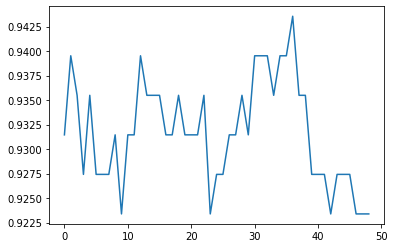

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)


result = [*map(lambda i:returnScore(i,xtrain, xtest, ytrain, ytest), range(1,50))]
print(result)
plt.plot(result)


print('BEST VALUE OF K',np.argmax(result) + 1 )


bestknn = KNeighborsClassifier(n_neighbors=np.argmax(result) + 1)

bestknn.fit(xtrain, ytrain)
print(bestknn.score(xtest, ytest))


ypred = bestknn.predict(xtest)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

**Data Examination Part 2**<br>
In this section we further examine the data via a Confusion Matrix. The goal of this is to simply get a visual representation of our model's accuracy; valued by the numbers and color below- a low # representing low accuracy.

<Figure size 432x288 with 0 Axes>

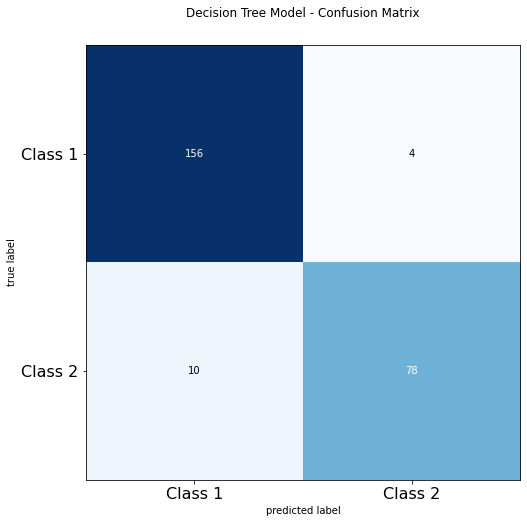

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, ypred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Data Examination Part 3**<br>
In this section we further examine the data via a Pair Plot. The goal of this is to get a visual representation of how much the various features mean- for instance we can that federal revenue plays a huge positive correlation with total revenue (of course) but can make deeper analysis, for instance that teacher salary plays an almost equally significant role to revenue.

<Figure size 288x288 with 0 Axes>

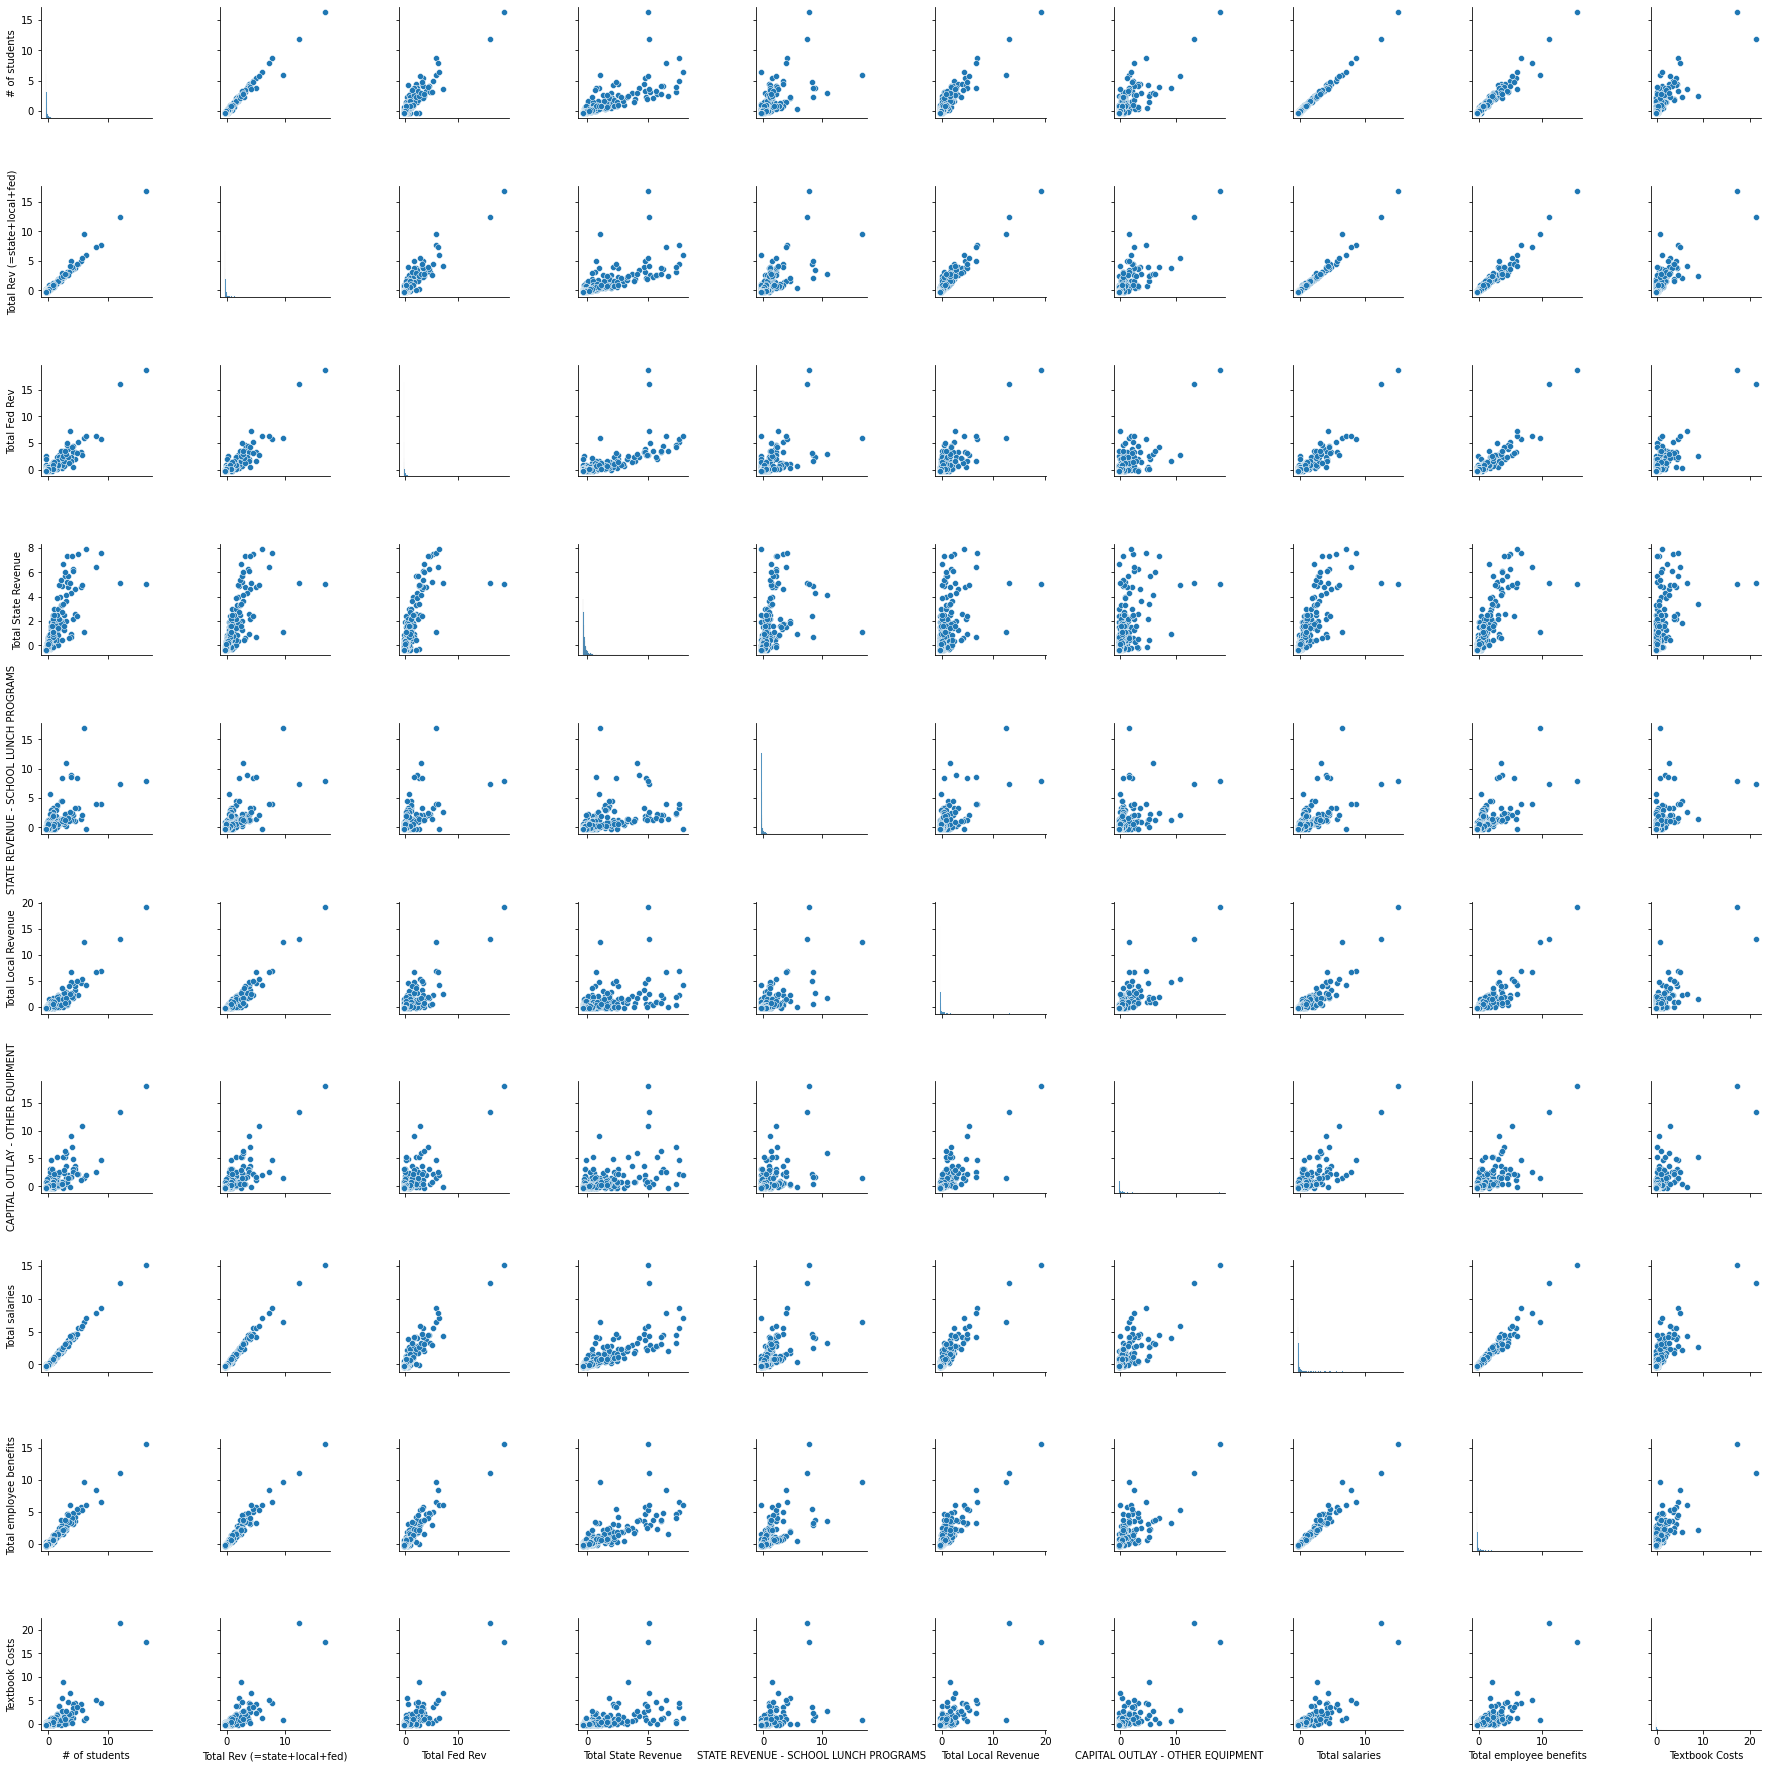

In [12]:
plt.figure(figsize=(4,4))
sns.pairplot(df)